# Projet Speed Dating (Tinder)

Analyses relatives aux relations entre match:
- qu'ont-ils en commun
- quand se rencontrent t-ils
- ...

## Import de modules externes

In [ ]:
import pandas as pd
# import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from data_loader import load_and_prepare_dataset

from speed_dating_document_context import (
    LabelDecoder,
)

# display settings
pd.set_option('display.max_columns', None)    # Show all columns
pd.set_option('display.width', 1000)          # Expand display width
pd.set_option('display.max_colwidth', None)   # Show full content in each cell

Data folder: /workspaces/jedha-cdsd-cert-projects/bloc-2/speed-dating/data


In [2]:
speed_dating_df = load_and_prepare_dataset()

print("Dataset shape: ", speed_dating_df.shape)

Dataset shape:  (8368, 201)


## EDA

### Analyse des rencontres entre participants et "Match"

#### Enrichissement du dataset

In [3]:
# Compute first and last date indicators.
participant_match_df = speed_dating_df.copy()

participant_match_df["diff_age"] = participant_match_df["age"] - participant_match_df["age_o"]

# Fisrt date is order == 1
participant_match_df["is_first_date_in_wave"] = participant_match_df["order"] == 1

# Last date: the one with highest order within a given wave
# A bit complex: each partner may not have met the same number of participants (wave 2)
# we should consider if we are the last date of the partner

# Add some partner related informations
def merge_partner_round_and_order_to_row(row):
    wave = row["wave"]
    iid = row["iid"]
    pid = row["pid"]
    
    row_o_mask = (participant_match_df["iid"] == pid) & (participant_match_df["pid"] == iid) & (participant_match_df["wave"] == wave)
    row_o = participant_match_df[row_o_mask]

    row["round_o"] = row_o["round"].iloc[0]
    row["order_o"] = row_o["order"].iloc[0]
    return row

tmp_participant_match_df = participant_match_df.apply(merge_partner_round_and_order_to_row, axis=1)

# defragment dataframe (or a perf warning will be raised)
participant_match_df = tmp_participant_match_df.copy()

participant_match_df["is_last_date_in_wave"] = participant_match_df["order"] == participant_match_df["round"]
participant_match_df["is_last_date_in_wave_o"] = participant_match_df["order_o"] == participant_match_df["round_o"]

# computing stats per wave about matches
match_count_per_wave = participant_match_df[participant_match_df["match"] == True].groupby(["wave"])["iid"].count()

# wave -> count of matches during the wave
match_count_per_wave_dict = match_count_per_wave.to_dict()

participant_match_df["wave_match_count"] = participant_match_df["wave"].map(match_count_per_wave_dict)

display(participant_match_df.head())

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,gender_label,race_label,race_label_o,goal_label,field_cd_label,career_c_label,diff_age,is_first_date_in_wave,round_o,order_o,is_last_date_in_wave,is_last_date_in_wave_o,wave_match_count
0,1,1,0,1,1,1,10,7,<NA>,4,1,11,0,0.14,0,27.0,2,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1,NaN,NaN,NaN,4,2.0,4.0,Chicago,"60,521","69,487.00",2,7,1,lawyer,15,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,Woman,Asian/Pacific Islander/Asian-American,European/Caucasian-American,To meet new people,Law,Other,-6.0,False,10,4,False,False,62
1,1,1,0,1,1,1,10,7,<NA>,3,2,12,0,0.54,0,22.0,2,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1,NaN,NaN,NaN,4,2.0,4.0,Chicago,"60,521","69,487.00",2,7,1,lawyer,15,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,Woman,Asian/Pacific Islander/Asian-American,European/Caucasian-American,To meet new people,Law,Other,-1.0,False,10,3,False,False,62
2,1,1,0,1,1,1,10,7,<NA>,10,3,13,1,0.16,1,22.0,4,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1,NaN,NaN,NaN,4,2.0,4.0,Chicago,"60,521","69,487.00",2,7,1,lawyer,15,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,Na

In [4]:
# Last date: the one with highest order within a given wave
round_count = participant_match_df.groupby("wave")["order"].max().sum()

wave_count = len(participant_match_df["wave"].unique())

first_and_last_count = 2 * wave_count
in_between_round_count = round_count - first_and_last_count

print("Rounds: ", round_count)
print("First+Last rounds: ", first_and_last_count)
print("In between rounds: ", in_between_round_count)

# max_order_dict = max_order_of_wave.to_dict()

Rounds:  283
First+Last rounds:  42
In between rounds:  241


In [5]:
first_date_mask = participant_match_df["is_first_date_in_wave"] == True
last_date_mask = participant_match_df["is_last_date_in_wave"] == True
last_date_o_mask = participant_match_df["is_last_date_in_wave_o"] == True

in_between_date = (participant_match_df["is_first_date_in_wave"] == False) & (participant_match_df["is_last_date_in_wave"] == False)
its_a_match_mask = participant_match_df["match"] == 1
sorry_no_match_mask = participant_match_df["match"] == 0

total_match_count = len(participant_match_df[its_a_match_mask])
total_no_match_count = len(participant_match_df[sorry_no_match_mask]) 
fist_date_match_count = len(participant_match_df[first_date_mask & its_a_match_mask])
last_date_match_count = len(participant_match_df[last_date_mask & its_a_match_mask])
in_between_date_match_count = len(participant_match_df[in_between_date & its_a_match_mask])

print("First date matches: ", fist_date_match_count)
print("Last date matches: ", last_date_match_count)
print("In between date matches: ", in_between_date_match_count)
print("Total matches: ", total_match_count)
print("Total NO matches: ", total_no_match_count)

First date matches:  127
Last date matches:  112
In between date matches:  1141
Total matches:  1380
Total NO matches:  6988


In [6]:
def build_wave_date_id(row):
    iid = row["iid"]
    wave = row["wave"]
    pid = row["pid"]
    # on choisi un ordre arbitraire, de sorte que pour les 2 participant l'ID du match soit le même
    if iid > pid:
        return f"{pid}_{iid}_{wave}"

    return f"{iid}_{pid}_{wave}"

def build_date_id(row):
    iid = row["iid"]
    pid = row["pid"]
    # on choisi un ordre arbitraire, de sorte que pour les 2 participant l'ID du match soit le même
    if iid > pid:
        return f"{pid}_{iid}"

    return f"{iid}_{pid}"

participant_match_df["wave_date_id"] = participant_match_df.apply(build_wave_date_id, axis=1)
participant_match_df["date_id"] = participant_match_df.apply(build_date_id, axis=1)

print("Nombre de dates: ", len(participant_match_df["wave_date_id"].unique()))
print("Nombre de couples: ", len(participant_match_df["date_id"].unique()))

wave_peer_dates = participant_match_df.groupby("wave_date_id")["wave_date_id"].count().to_frame()
wave_peer_dates.columns = ["date_count"]

peer_dates = participant_match_df.groupby("date_id")["date_id"].count().to_frame()
peer_dates.columns = ["date_count"]


Nombre de dates:  4184
Nombre de couples:  4184


On a un total de 4184 dates

#### Pour obtenir un deuxième rendez-vous, vaut-il mieux être le premier speed date de la soirée ou le dernier ?

In [7]:
# matches on first date
wave_stats_df = participant_match_df[first_date_mask].groupby(["wave", "wave_match_count"])["match"].sum().reset_index()
wave_stats_df.columns = ["wave", "wave_match_count", "first_date_match_count"]

# matches on last date of any partner
last_date_match_per_wave = participant_match_df[last_date_mask | last_date_o_mask].groupby(["wave"])["match"].sum()
last_date_match_per_wave_dict = last_date_match_per_wave.to_dict()

wave_stats_df["last_date_match_count"] = wave_stats_df["wave"].map(last_date_match_per_wave_dict)

# matches on last participant date (sometime same as last partner date)
last_participant_date_match_per_wave = participant_match_df[last_date_mask].groupby(["wave"])["match"].sum()
last_participant_date_match_per_wave = last_date_match_per_wave.to_dict()

wave_stats_df["last_participant_date_match_count"] = wave_stats_df["wave"].map(last_participant_date_match_per_wave)

wave_stats_df["first_date_match_percent"] = wave_stats_df["first_date_match_count"] * 100 / wave_stats_df["wave_match_count"]
wave_stats_df["last_date_match_percent"] = wave_stats_df["last_date_match_count"] * 100 / wave_stats_df["wave_match_count"]
wave_stats_df["last_participant_date_match_percent"] = wave_stats_df["last_participant_date_match_count"] * 100 / wave_stats_df["wave_match_count"]

display(wave_stats_df)

,wave,wave_match_count,first_date_match_count,last_date_match_count,last_participant_date_match_count,first_date_match_percent,last_date_match_percent,last_participant_date_match_percent
0,1,62,6,6,6,9.677419,9.677419,9.677419
1,2,62,6,2,2,9.677419,3.225806,3.225806
2,3,26,6,4,4,23.076923,15.384615,15.384615
3,4,130,10,10,10,7.692308,7.692308,7.692308
4,5,54,6,6,6,11.111111,11.111111,11.111111
5,6,10,0,4,4,0.000000,40.000000,40.000000
6,7,86,10,8,8,11.627907,9.302326,9.302326
7,8,36,6,4,4,16.666667,11.111111,11.111111
8,9,124,8,6,6,6.451613,4.838710,4.838710
9,10,30,0,4,4,0.000000,13.333333,13.333333


La différentiation du last date (participant/partenaire) ne semble pas si pertinente.

round
first_date_match_percent     9.068304
last_date_match_percent     13.111747
Name: count, dtype: float64

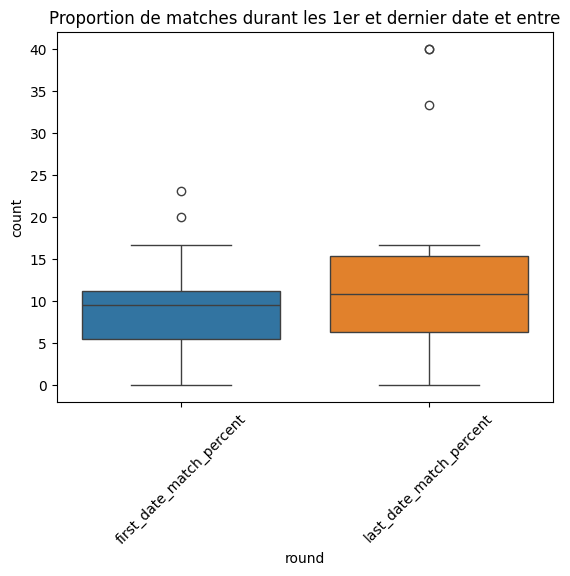

In [8]:
stats_df = wave_stats_df[["first_date_match_percent", "last_date_match_percent"]].stack().reset_index()

stats_df.drop(columns=["level_0"], inplace=True)

stats_df.columns = ["round", "count"]

# convert to a categorical variable with the categories in the "correct" order
stats_df['round'] = pd.Categorical(stats_df['round'], categories=["first_date_match_percent", "last_date_match_percent"])

# display(stats_df)

box = sns.boxplot(stats_df, x='round', y='count',  hue="round", legend=False)

box.set_title("Proportion de matches durant les 1er et dernier date et entre")
box.tick_params(axis='x', labelrotation=45)

display(stats_df.groupby(by="round", observed=True)["count"].mean())

<span style="color:red"><b>Remarque</b></span> : On pourrait penser que le round de la dernière chance n'est pas une légende... Mais la différence est vraiment infime.

#### Impact des éléments en commun: race, centre d'intérêts

In [9]:
matched_df = participant_match_df[participant_match_df["match"] == 1]

# Everything is x2, so it's ok
all_date_count = len(participant_match_df)
all_match_count = len(matched_df)

print("Overall matches:")
overall_date_stats_df = participant_match_df["match"].agg(["sum", "count"]).to_frame().transpose()
overall_date_stats_df.columns = ["match_count", "date_count"]

overall_date_stats_df["match_ratio"] = round(overall_date_stats_df["match_count"] * 100 / overall_date_stats_df["date_count"], 2)

display(overall_date_stats_df)

print("Samerace backgound:")

samerace_date_stats_df = participant_match_df.groupby("samerace")["match"].agg(["sum", "count"]).reset_index()
samerace_date_stats_df.columns = ["samerace", "match_count", "date_count"]
samerace_date_stats_df["samerace_match_ratio"] = round(samerace_date_stats_df["match_count"] * 100 / samerace_date_stats_df["date_count"], 2)
samerace_date_stats_df["overall_match_ratio"] = round(samerace_date_stats_df["match_count"] * 100 / all_match_count, 2)

display(samerace_date_stats_df)

# Shared interests: int_corr
print("Shared interests backgound:")
int_corr_values = participant_match_df["int_corr"].unique()

# Create three groups within correlation range
int_corr_bins = [-1.0, -0.5, 0.5, 1.0]
int_corr_bins_labels = ["Bad", "Neutral", "Good"]

participant_match_df["int_corr_group"] = pd.cut(participant_match_df["int_corr"], int_corr_bins, labels=int_corr_bins_labels)

shared_interests_date_stats_df = participant_match_df.groupby("int_corr_group", observed=True)["match"].agg(["sum", "count"]).reset_index()

shared_interests_date_stats_df.columns = ["int_corr_group", "match_count", "date_count"]

shared_interests_date_stats_df["int_corr_match_ratio"] = round(shared_interests_date_stats_df["match_count"] * 100 / shared_interests_date_stats_df["date_count"], 2)
shared_interests_date_stats_df["overall_match_ratio"] = round(shared_interests_date_stats_df["match_count"] * 100 / all_match_count, 2)

display(shared_interests_date_stats_df)

Overall matches:


,match_count,date_count,match_ratio
match,1380,8368,16.49


Samerace backgound:


,samerace,match_count,date_count,samerace_match_ratio,overall_match_ratio
0,0,814,5052,16.11,58.99
1,1,566,3316,17.07,41.01


Shared interests backgound:


,int_corr_group,match_count,date_count,int_corr_match_ratio,overall_match_ratio
0,Bad,20,104,19.23,1.45
1,Neutral,1054,6692,15.75,76.38
2,Good,276,1414,19.52,20.00


58% des matchs n'ont pas de race commune.
42% des matchs sont de races mixtes.
20% des matchs ont de nombreux intérêts en commun (importante correlation entre les évaluations d'intérêt).

#### Recherche de corrélations évidentes

In [10]:
corr_analysis_cols = ['int_corr', 'samerace',
       'age_o', 'race_o', "dec_o",
       'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha',
       'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o',
       'age', 'diff_age', 'field_cd', 'race', 'imprace', 'imprelig',
       'goal', 'career_c', 'sports', 'tvsports', 'exercise', 'dining',
       'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv',
       'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga',
       'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1',
       "attr3_2", "sinc3_2", "intel3_2", "fun3_2", "amb3_2"
]

corr_analysis_df = participant_match_df[corr_analysis_cols]

corr_res = corr_analysis_df.corrwith(corr_analysis_df["dec_o"])

corr_df = pd.DataFrame(corr_res, columns=["correlation"])

display(corr_df.sort_values(by="correlation", ascending=False).head(25))

,correlation
dec_o,1.000000
attr_o,0.487160
fun_o,0.414862
shar_o,0.400501
intel_o,0.216704
sinc_o,0.209811
amb_o,0.183216
fun3_2,0.106351
attr3_2,0.083946
exercise,0.083083


Celà confirme simplement ce que l'on a déjà pu observer, l'attractivité et le fun sont prédominant dans les déclenchement de match.

#### Quid des évaluations des participants ayant eu des RDV par la suite

In [11]:
# "date_3",        # Rendez-vous avec des correspondances (1=oui, 0=non)
# "numdat_3",      # Nombre de correspondances avec qui il y a eu un rendez-vous

followup_time3_date_df=participant_match_df[["iid", "gender_label", "match", "date_3", "numdat_3", "attr_o", "sinc_o", "intel_o", "fun_o", "amb_o", "shar_o"]]
followup_time3_date_df = followup_time3_date_df.groupby(["iid", "gender_label"], as_index=False).agg({ "date_3": "max", "numdat_3": "max", "match": "sum", "attr_o": "mean", "sinc_o": "mean", "intel_o": "mean", "fun_o": "mean", "amb_o": "mean", "shar_o": "mean" })

display(followup_time3_date_df)

with_date_df = followup_time3_date_df[followup_time3_date_df["date_3"] == 1].reset_index()

display(with_date_df)

,iid,gender_label,date_3,numdat_3,match,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o
0,1,Woman,0.0,NaN,4,6.700000,7.400000,8.000000,7.200000,8.000000,7.100000
1,2,Woman,0.0,NaN,2,7.700000,7.100000,7.900000,7.500000,7.500000,6.500000
2,3,Woman,NaN,NaN,0,6.500000,7.100000,7.300000,6.200000,7.111111,6.000000
3,4,Woman,0.0,NaN,2,7.000000,7.100000,7.700000,7.500000,7.700000,7.200000
4,5,Woman,0.0,NaN,2,5.300000,7.700000,7.600000,7.200000,7.800000,6.200000
...,...,...,...,...,...,...,...,...,...,...,...
546,548,Man,0.0,NaN,5,6.857143,5.809524,6.666667,5.714286,6.150000,4.450000
547,549,Man,0.0,NaN,5,6.350000,6.650000,6.850000,6.650000,6.000000,5.111111
548,550,Man,NaN,NaN,4,5.136364,5.818182,6.500000,5.272727,6.363636,4.190476
549,551,Man,NaN,NaN,2,6.142857,6.666667,6.761905,5.571429,6.238095,5.166667


,index,iid,gender_label,date_3,numdat_3,match,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o
0,60,61,Woman,1.0,NaN,2,4.000000,7.100000,7.555556,5.300000,5.700000,4.300000
1,68,69,Man,1.0,NaN,2,7.300000,7.600000,7.900000,7.100000,7.111111,5.900000
2,75,76,Woman,1.0,NaN,5,6.222222,6.944444,7.833333,7.647059,6.533333,6.066667
3,76,77,Woman,1.0,NaN,6,6.833333,7.235294,7.277778,6.529412,6.333333,5.785714
4,77,78,Woman,1.0,NaN,3,6.472222,6.882353,6.694444,5.411765,5.250000,4.692308
...,...,...,...,...,...,...,...,...,...,...,...,...
89,522,524,Woman,1.0,1.0,14,7.000000,7.750000,7.857143,7.714286,7.000000,6.050000
90,524,526,Woman,1.0,1.0,2,4.550000,6.904762,6.428571,6.476190,5.550000,4.300000
91,535,537,Man,1.0,1.0,2,6.000000,5.904762,6.809524,6.500000,6.421053,5.611111
92,543,545,Man,1.0,1.0,2,6.000000,6.230769,6.076923,6.076923,6.000000,4.916667


In [12]:
with_date_plot_df = with_date_df[["gender_label", "attr_o", "sinc_o", "intel_o", "fun_o", "amb_o", "shar_o"]]

with_date_plot_df = pd.melt(
    with_date_plot_df,
    id_vars=["gender_label"],
    var_name='attribute', 
    value_name='rating'
)

with_date_plot_df['attribute_name'] = with_date_plot_df['attribute'].map(LabelDecoder.get_attribute_label)

display(with_date_plot_df)



,gender_label,attribute,rating,attribute_name
0,Woman,attr_o,4.000000,Attractive
1,Man,attr_o,7.300000,Attractive
2,Woman,attr_o,6.222222,Attractive
3,Woman,attr_o,6.833333,Attractive
4,Woman,attr_o,6.472222,Attractive
...,...,...,...,...
559,Woman,shar_o,6.050000,Shared Interests/Hobbies
560,Woman,shar_o,4.300000,Shared Interests/Hobbies
561,Man,shar_o,5.611111,Shared Interests/Hobbies
562,Man,shar_o,4.916667,Shared Interests/Hobbies


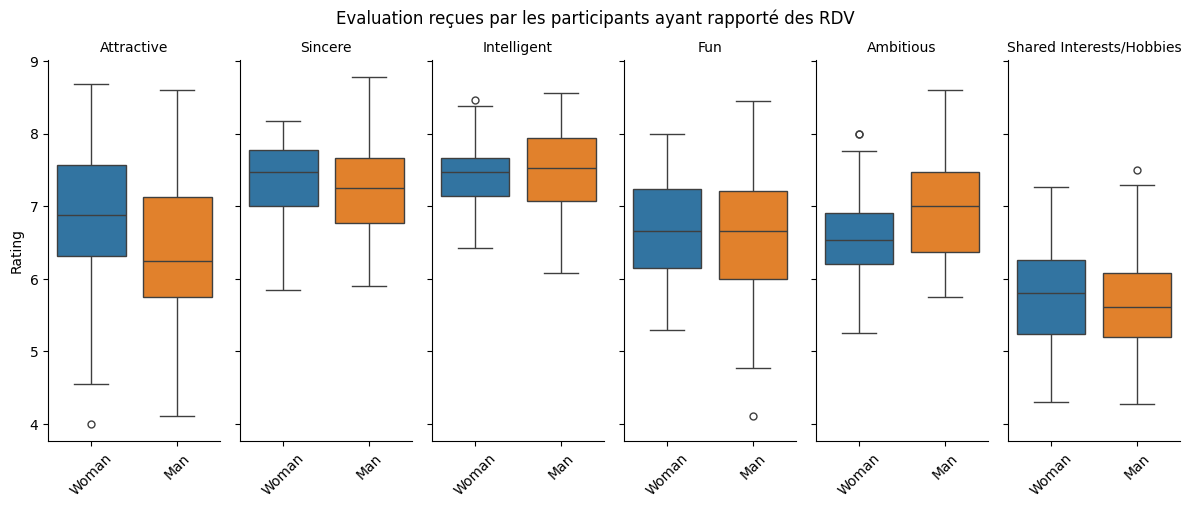

In [13]:
g = sns.catplot(data=with_date_plot_df,
        x="gender_label", y="rating",
        col="attribute_name",
        kind="box", hue="gender_label", height=5, aspect=.4)

g.fig.subplots_adjust(top=0.88)
g.fig.suptitle("Evaluation reçues par les participants ayant rapporté des RDV")

g.set_axis_labels("", "Rating")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=45)

Intelligence et sincérité semble prendre le dessus ici, mais c'est vraiment trés subtil!